In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, random, tempfile, requests
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import utils

### 確認するモデルを指定

In [8]:
model_size = ["n", "s", "m", "l", "x"][0]

### 通常の物体検出モデル
# model = YOLO(f"./models/yolov8{model_size}.pt")

### インスタンスセグメンテーションのモデル
# model = YOLO(f"./models/yolov8{model_size}-seg.pt")

### Keypoint検出（骨格検出）のモデル
# model = YOLO(f"./models/yolov8{model_size}-pose")

# 自作モデル
# model = YOLO(f"./output/yolov8/20230713-1206_yolov8n_mask_yolo_dataset/weights/best.pt")
model = YOLO(f"./output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.pt")

### ローカルのデータセットの画像で推論を確認

0: 576x640 6 Balls, 1 Board, 13.1ms
Speed: 2.5ms preprocess, 13.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 640)


{0: 'None', 1: 'Ball', 2: 'Board'}


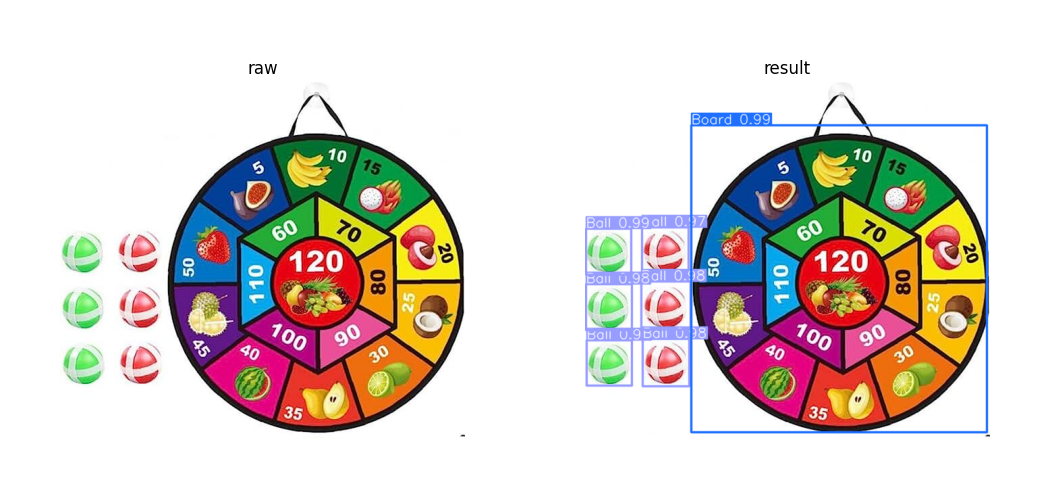

In [15]:
imgs = {}

img_dir = Path("./dataset/sentan-B_ball_detection_yolo/train/images")
sample_imgPath = random.choice(list(img_dir.glob("*.jpg")))
imgs["raw"] = cv2.imread(str(sample_imgPath))[:,:,::-1]

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.4,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

imgs["result"] = result[0].plot()

utils.show_imgs(imgs, dpi=600, font_scale=0.2)

### Webの画像で推論を確認


0: 640x640 (no detections), 144.6ms
Speed: 2.4ms preprocess, 144.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


{0: 'None', 1: 'Ball', 2: 'Board'}


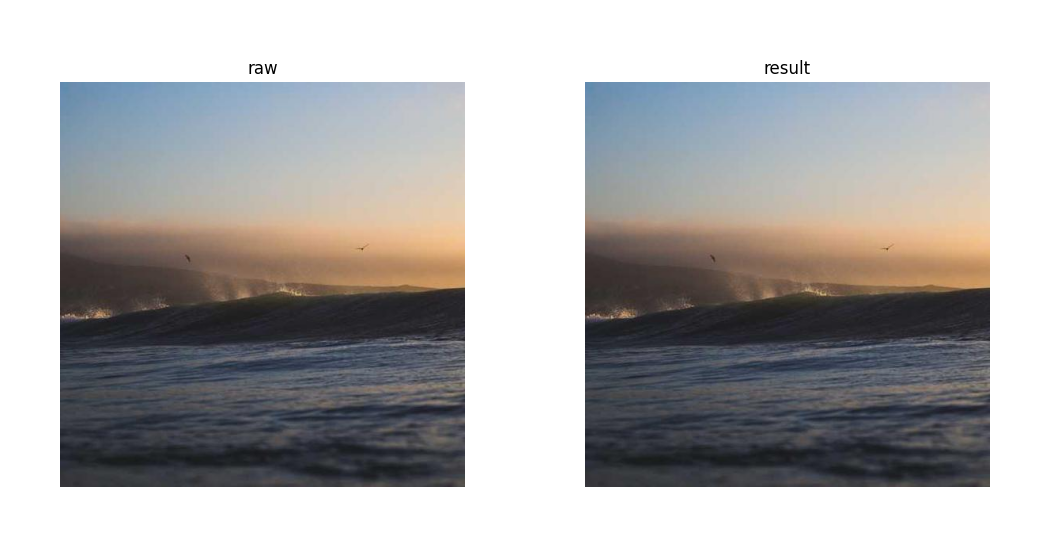

In [4]:
imgs = {}

sample_img_url = "https://picsum.photos/512"
imgs["raw"] = utils.imread_web(sample_img_url)[:, :, ::-1]

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.5,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

imgs["result"] = result[0].plot()

utils.show_imgs(imgs, dpi=600, font_scale=0.2)

### カメラで確認

In [5]:
import cv2
import IPython
from PIL import Image
from io import BytesIO

model = YOLO(f"./output/yolov8/20230713-1206_yolov8n_mask_yolo_dataset/weights/best.pt")

cap = cv2.VideoCapture(0)
assert cap.isOpened(), 'Could not open video device'

try:
    while(True):
        ret, frame = cap.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            result = model(
                source    = imgs["raw"],
                conf      = 0.5,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

            f = BytesIO()
            Image.fromarray(result[0].plot()).save(f, "jpeg")
            IPython.display.display(IPython.display.Image(data=f.getvalue()))
            
            IPython.display.clear_output(wait=True)

except KeyboardInterrupt:
    cap.release()
    print('Stream stopped')


[ WARN:0@8.139] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@8.139] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


AssertionError: Could not open video device